In [1]:
from tensorflow.keras.preprocessing import sequence

X_train = sequence.pad_sequence(X_train, maxlen=100)
X_test = sequence.pad_sequence(X_test, maxlen=100)

AttributeError: module 'keras.api._v2.keras.preprocessing.sequence' has no attribute 'pad_sequence'

In [2]:
from keras.utils import np_utils
# 데이터 전처리
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

NameError: name 'y_train' is not defined

In [3]:
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing import sequence
from keras.utils import np_utils

# 로이터 뉴스 데이터셋 불러오기
reuters.load_data()

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 불러온 데이터를 학습셋과 테스트셋으로 나누기
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000,
                                                         test_split=0.2)

# 데이터 확인하기
category = numpy.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

2110848/2110848 [==============================] - 0s 0us/step
46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


Epoch 1/20
90/90 [==============================] - 20s 194ms/step - loss: 2.5777 - accuracy: 0.3497 - val_loss: 2.1698 - val_accuracy: 0.4488
Epoch 2/20
90/90 [==============================] - 18s 198ms/step - loss: 2.0353 - accuracy: 0.4901 - val_loss: 1.9272 - val_accuracy: 0.5120
Epoch 3/20
90/90 [==============================] - 18s 201ms/step - loss: 1.8689 - accuracy: 0.5187 - val_loss: 1.7583 - val_accuracy: 0.5525
Epoch 4/20
90/90 [==============================] - 19s 209ms/step - loss: 1.7075 - accuracy: 0.5543 - val_loss: 1.7365 - val_accuracy: 0.5414
Epoch 5/20
90/90 [==============================] - 17s 187ms/step - loss: 1.6545 - accuracy: 0.5747 - val_loss: 1.6865 - val_accuracy: 0.5748
Epoch 6/20
90/90 [==============================] - 20s 217ms/step - loss: 1.5572 - accuracy: 0.6072 - val_loss: 1.5532 - val_accuracy: 0.6171
Epoch 7/20
90/90 [==============================] - 19s 214ms/step - loss: 1.4217 - accuracy: 0.6431 - val_loss: 1.4605 - val_accuracy: 0.6389

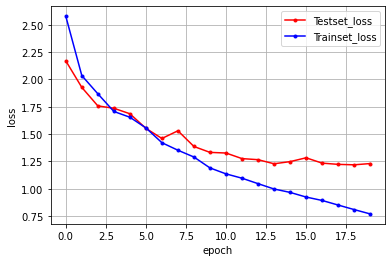

In [4]:
# 데이터 전처리
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 모델의 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

# 모델의 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

# 모델의 실행
history = model.fit(X_train, y_train, batch_size=100,
                   epochs=20, validation_data=(X_test, y_test))

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [5]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# 학습셋, 테스트셋 지정하기
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# 데이터 전처리
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

17464789/17464789 [==============================] - 2s 0us/step


In [6]:
# 모델의 컴파일
model.compile(loss = 'binary_crossentropy'
              ,optimizer='adam',
             metrics=['accuracy'])

# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100,
                   epochs=5, validation_data=(x_test, y_test))

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

NameError: name 'x_train' is not defined